# Creating Table with PostgreSQL

In [1]:
!pip install psycopg2

## Import the library


In [2]:
import psycopg2

## create a connection with Data Base


In [4]:
try:
    conn = psycopg2.connect("host = localhost dbname=postgres port = 5498 user=postgres password = i20feverABC$")
except psycopg2.Error as e:
    print("Error: could not make connection to the postgres database ")
    print(e)

## Use the connection to get a cursor that can be used to execute queries

In [8]:
try:
    cur = conn.cursor()
except psycopg2.Error as e :
     print("Error: could not get cursor to the database ")
    
     print(e)
    

## set automatic commit to be true so that each action is comitted without having to call conn.commit() after each command

In [9]:
conn.set_session(autocommit = True)

## create the database to do the work in

In [10]:
try:
    cur.execute("create database myfirstdb")
except psycopg2.Error as e:
    print(e)

## we can see tis database created in postgresql shell

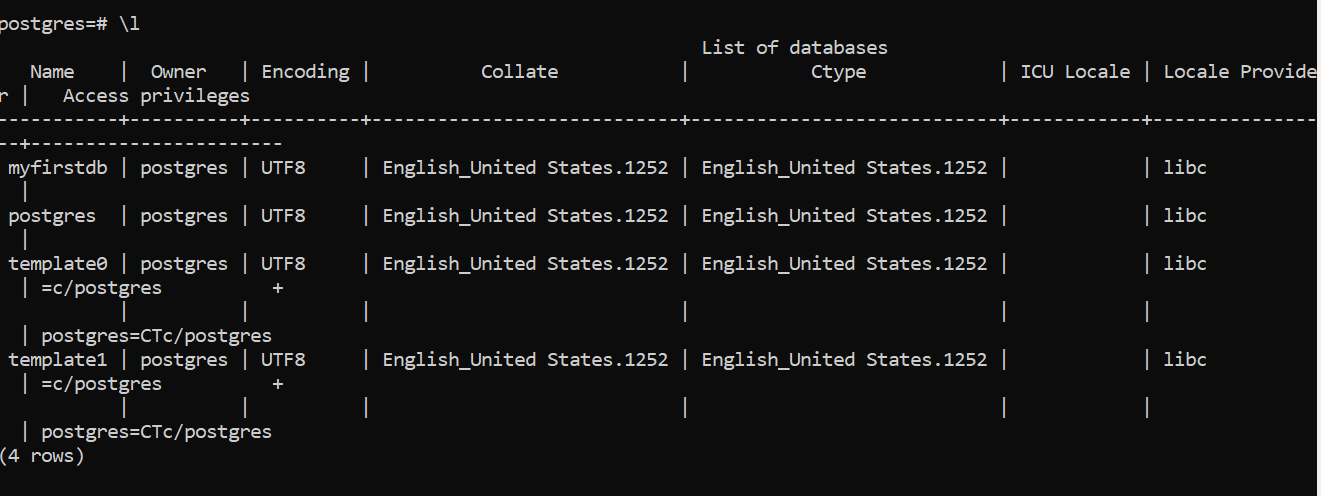

## change the connection to the new database created

In [12]:
try:
    conn.close()
except psycopg2.Error as e:
    print(e)
try:
    conn = psycopg2.connect("host = localhost dbname=myfirstdb port = 5498 user=postgres password = i20feverABC$")
except psycopg2.Error as e:
    print("Error: could not make connection to the postgres database ")
    print(e)
    
try:
    cur = conn.cursor()
except psycopg2.Error as e :
     print("Error: could not get cursor to the database ")
     
     print(e)
conn.set_session(autocommit = True)
    


# Create table which includes following columns
* Student_ID
* name
* age
* Gender
* subject
* marks

In [13]:
try:
    cur.execute('CREATE TABLE IF NOT EXISTS students(student_id int, name varchar, age int, gender varchar, \
                subject varchar,marks int)')
except psycopg2.Error as e:
    print("Error: could not create table ")
    print(e)

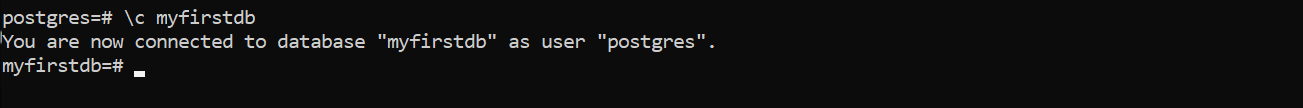

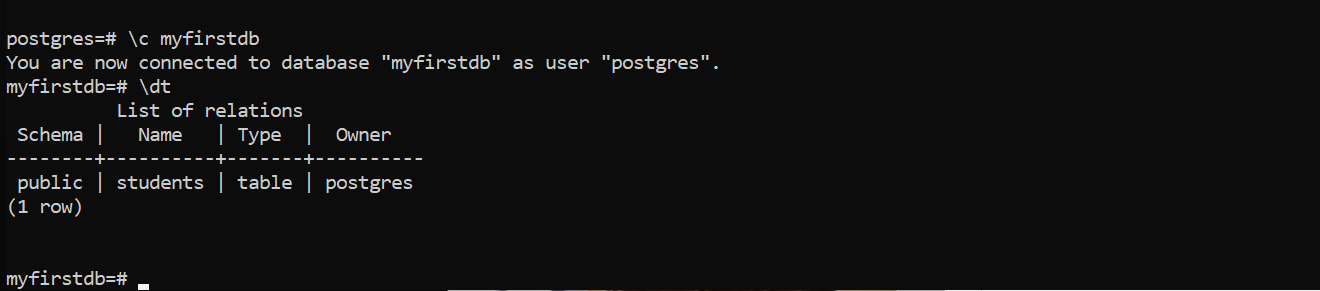

## insert two rows in Table

In [14]:
try:
    cur.execute("INSERT INTO students (student_id,name,age,gender,subject,marks)\
    VALUES(%s,%s,%s,%s,%s,%s)",\
               (1,"Raj",23,"Male","Python",85))
except psycopg2.Error as e:
    print("Error: inserting rows ")
    print(e)
try:
    cur.execute("INSERT INTO students (student_id,name,age,gender,subject,marks)\
    VALUES(%s,%s,%s,%s,%s,%s)",\
               (2,"Priya",22,"Female","Python",86))
except psycopg2.Error as e:
    print("Error: inserting rows ")
    print(e)

##  validate your Data was inserted

In [15]:
try:
    cur.execute("SELECT * FROM students;")
except psycopg2.Error as e:
    print("Error: select * ")
    print(e)
row = cur.fetchone()
while row:
    print(row)
    row = cur.fetchone()

(1, 'Raj', 23, 'Male', 'Python', 85)
(2, 'Priya', 22, 'Female', 'Python', 86)


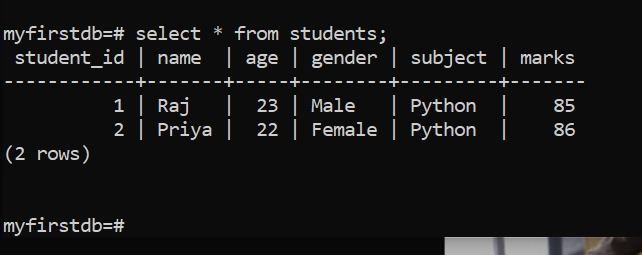

## close your cursor and connection

In [16]:
cur.close()
conn.close()